# Graphs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


C:\Users\mrbon\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)

In [3]:
# Read DataFrame
pkls_path = pkls = r'D:\Tesis\ResEleCon-MX\pickles'
ener = pd.read_pickle(pkls_path + '/total_energy.pkl')

Group households by UPM: sum and mean

In [4]:
ener_ageb = ener.loc[~ener['CVE_ZM'].isnull(), ['CVE_ZM','upm','ing_cor','fuel','gas','kwh','total_ener']].groupby(['CVE_ZM','upm'], as_index=False).sum(min_count=1)
ener_upm_mean = ener.loc[~ener['CVE_ZM'].isnull(), ['CVE_ZM','upm','ing_cor','fuel','gas','kwh','total_ener']].groupby(['CVE_ZM','upm'], as_index=False).mean()

ener_ordered = ener_ageb.sort_values(by=['total_ener'], ignore_index=True)

In [5]:
ener_upm_mean.describe()

,CVE_ZM,upm,ing_cor,fuel,gas,kwh,total_ener
count,5897.000000,5897.000000,5.897000e+03,5355.000000,5552.000000,5875.000000,5896.000000
mean,15.032416,4106.092929,6.263094e+04,846.378237,89.217443,220.411401,748.151871
std,9.300404,2408.136152,7.848248e+04,554.673115,199.585483,162.606159,621.025837
min,1.010000,1.000000,8.542093e+03,37.036256,0.027210,27.177458,0.089506
25%,7.020000,2130.000000,3.813852e+04,475.939742,0.247362,121.936182,333.325016
50%,14.010000,4083.000000,5.038709e+04,734.360970,0.354218,163.988350,580.300328
75%,23.010000,6125.000000,6.943368e+04,1069.729656,55.804753,260.803346,997.003775
max,32.010000,8351.000000,4.033086e+06,6885.275366,3419.881312,1982.472652,9443.953757


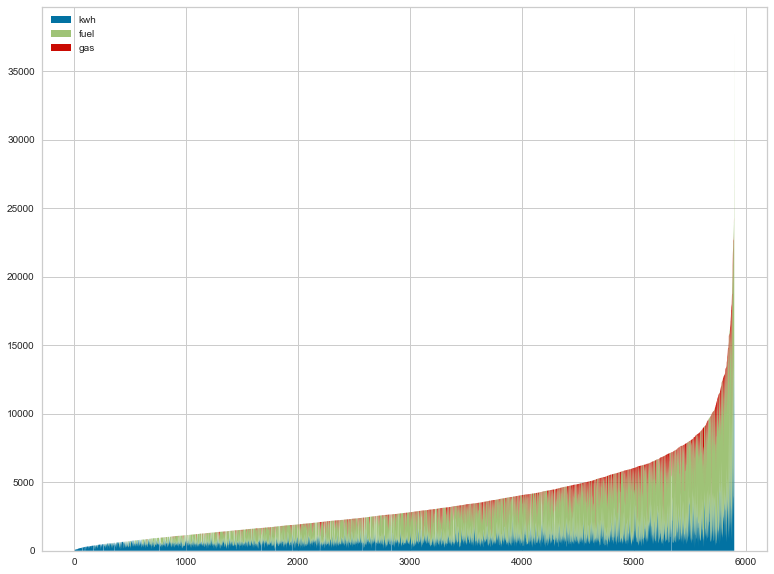

In [6]:
# Data
x=ener_ordered.index
y=[ener_ordered.kwh.to_list(),ener_ordered.fuel.to_list(),ener_ordered.gas.to_list()]

# Plot
fig, ax = plt.subplots(figsize=(13,10))
ax.stackplot(x,y, labels=['kwh','fuel','gas'])
plt.legend(loc='upper left')
plt.show()

## Deciles

In [7]:
ener_upm_mean['kwh_d'] = pd.qcut(ener_upm_mean['kwh'], 10, labels=False)
ener_upm_mean['fuel_d'] = pd.qcut(ener_upm_mean['fuel'], 10, labels=False)
ener_upm_mean['gas_d'] = pd.qcut(ener_upm_mean['gas'], 10, labels=False)

In [8]:
ener_ageb['kwh_d'] = pd.qcut(ener_ageb['kwh'], 10, labels=False)
ener_ageb['fuel_d'] = pd.qcut(ener_ageb['fuel'], 10, labels=False)
ener_ageb['gas_d'] = pd.qcut(ener_ageb['gas'], 10, labels=False)

In [9]:
ener_ageb.describe()

,CVE_ZM,upm,ing_cor,fuel,gas,kwh,total_ener,kwh_d,fuel_d,gas_d
count,5897.000000,5897.000000,5.897000e+03,5355.000000,5552.000000,5875.000000,5896.000000,5875.000000,5355.000000,5552.000000
mean,15.032416,4106.092929,3.019015e+05,2428.633670,325.542053,1029.410574,3538.081734,4.499915,4.484034,4.497298
std,9.300404,2408.136152,2.244631e+05,2149.111043,718.363827,993.882946,2955.619005,2.872881,2.891946,2.875422
min,1.010000,1.000000,1.433151e+04,44.131948,0.027210,27.177458,0.358023,0.000000,0.000000,0.000000
25%,7.020000,2130.000000,1.812054e+05,951.881123,0.651368,513.855630,1517.840324,2.000000,2.000000,2.000000
50%,14.010000,4083.000000,2.494352e+05,1851.834778,1.207206,734.455691,2762.762787,4.000000,4.000000,4.500000
75%,23.010000,6125.000000,3.437963e+05,3236.395817,206.069854,1183.420898,4738.585856,7.000000,7.000000,7.000000
max,32.010000,8351.000000,4.033086e+06,20263.811840,10259.643937,17505.673895,37773.374551,9.000000,9.000000,9.000000


### By sum

In [10]:
ener_reg = ener_ageb[(ener_ageb.kwh_d.notna()) & (ener_ageb.fuel_d.notna()) & (ener_ageb.gas_d.notna())]

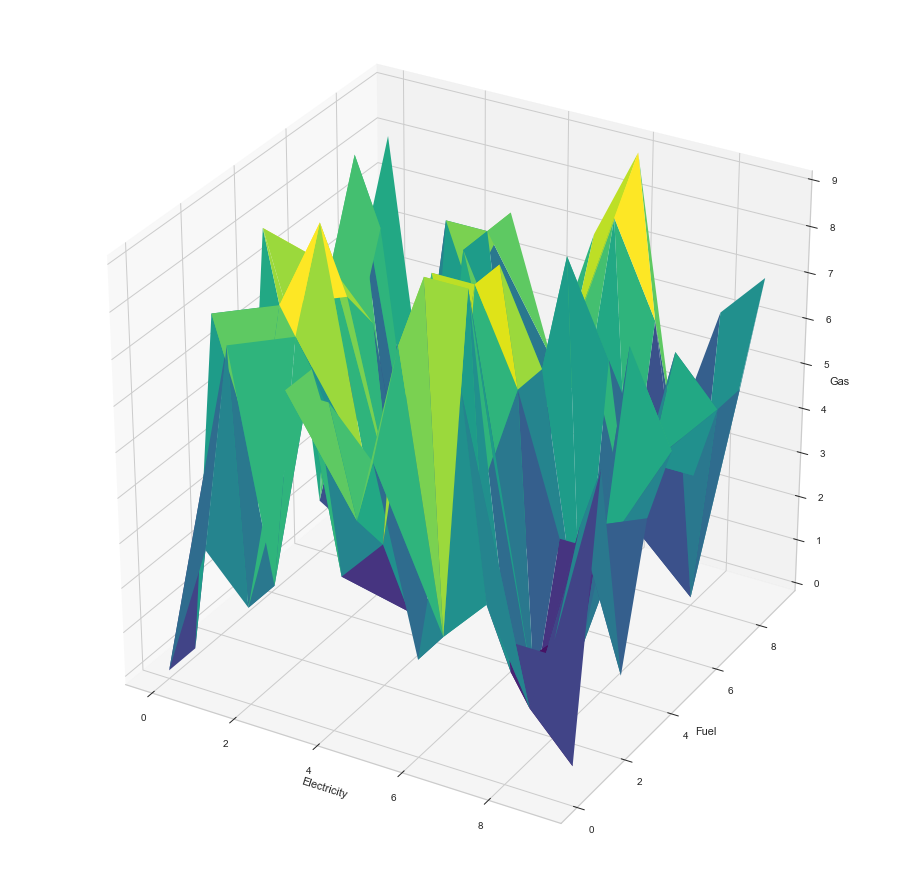

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,16))
ax = fig.gca(projection='3d')

ax.plot_trisurf(ener_reg['kwh_d'], ener_reg['fuel_d'], ener_reg['gas_d'], linewidth=0.2, antialiased=True, cmap='viridis', edgecolor='none')

ax.set_xlabel('Electricity')
ax.set_ylabel('Fuel')
ax.set_zlabel('Gas')

plt.show()

### By mean

In [12]:
ener_reg1 = ener_upm_mean[(ener_upm_mean.kwh_d.notna()) & (ener_upm_mean.fuel_d.notna()) & (ener_upm_mean.gas_d.notna())]

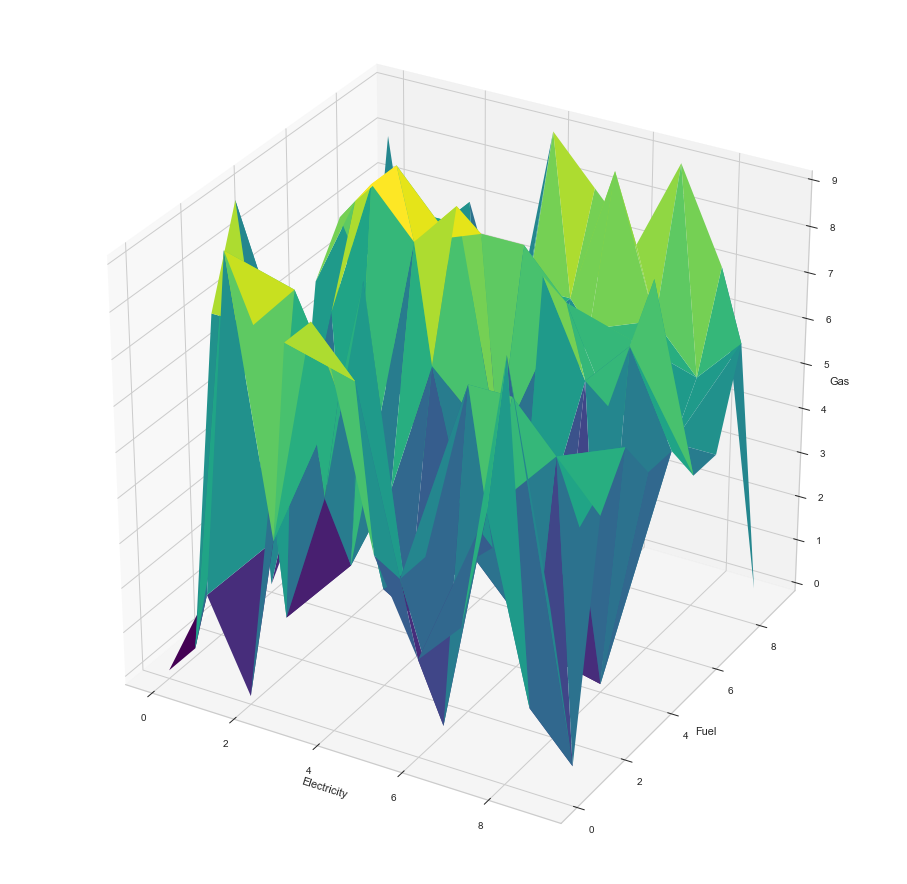

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,16))
ax = fig.gca(projection='3d')

ax.plot_trisurf(ener_reg1['kwh_d'], ener_reg1['fuel_d'], ener_reg1['gas_d'], linewidth=0.2, antialiased=True, cmap='viridis', edgecolor='none')

ax.set_xlabel('Electricity')
ax.set_ylabel('Fuel')
ax.set_zlabel('Gas')

plt.show()

### By sum

In [14]:
ener_ageb['income_d'] = pd.qcut(ener_ageb['ing_cor'], 10, labels=False)

Text(0.049826165457624, -0.06420974047744715, 'Fuel')

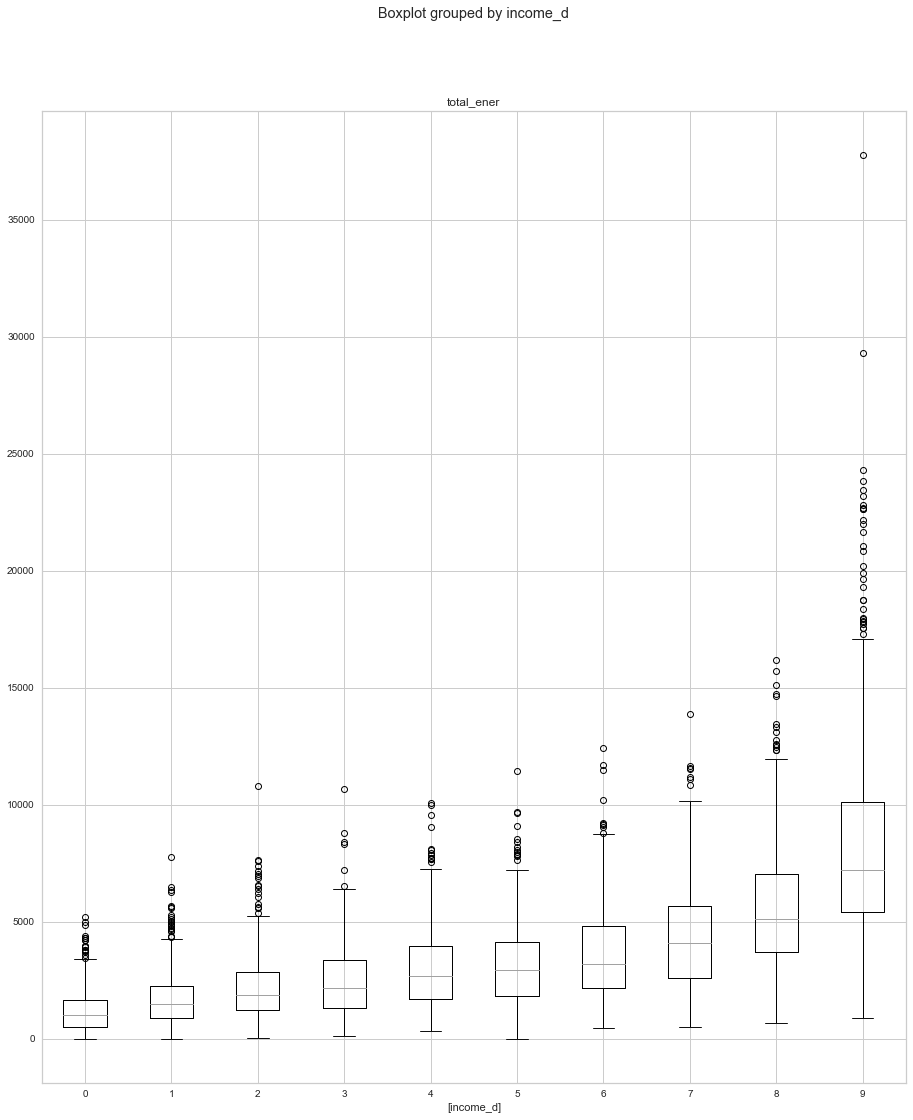

In [15]:
ener_ageb.boxplot(column=['total_ener'], by=['income_d'], figsize=(15,18))
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

### By mean

In [16]:
ener_upm_mean['income_d'] = pd.qcut(ener_upm_mean['ing_cor'], 10, labels=False)

Text(0.049826165457624, -0.06420974047744715, 'Fuel')

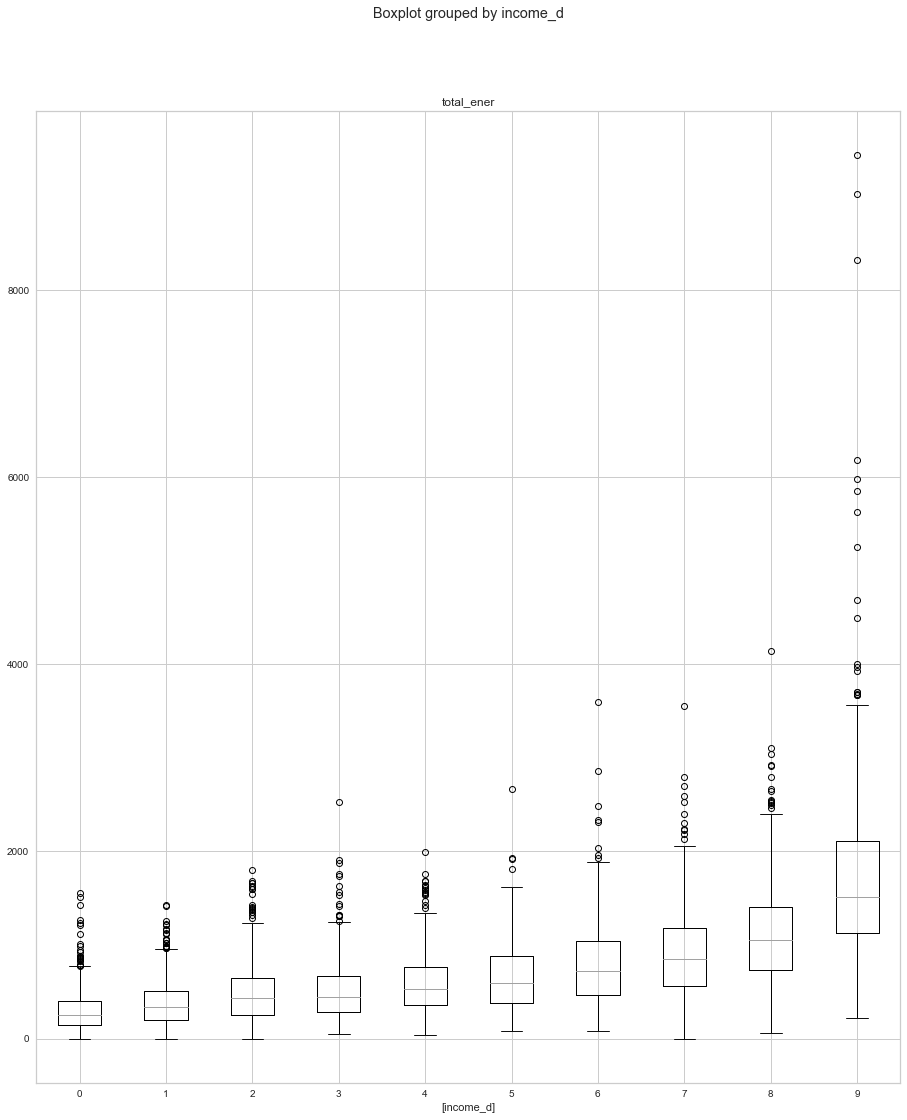

In [17]:
ener_upm_mean.boxplot(column=['total_ener'], by=['income_d'], figsize=(15,18))
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

## Clusters
### By sum

In [18]:
def silhouette_visualizer(range_n_clusters, X):
    for n_clusters in range_n_clusters:
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

In [22]:
X = ener_ageb[['fuel','gas','kwh']]

### By mean

In [23]:
X = ener_upm_mean[['fuel','gas','kwh']]
X = X.dropna()

In [24]:
names = ['fuel','gas','kwh']
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(X)
X = pd.DataFrame(df_mm, columns=names)

For n_clusters = 2 The average silhouette_score is : 0.5115602181902669
For n_clusters = 3 The average silhouette_score is : 0.42374069061863917
For n_clusters = 4 The average silhouette_score is : 0.43124079415762817
For n_clusters = 5 The average silhouette_score is : 0.4166936024222577
For n_clusters = 6 The average silhouette_score is : 0.361835267833227
For n_clusters = 7 The average silhouette_score is : 0.3532826613676655
For n_clusters = 8 The average silhouette_score is : 0.33864502411935593


C:\Users\mrbon\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001C136EA0348>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

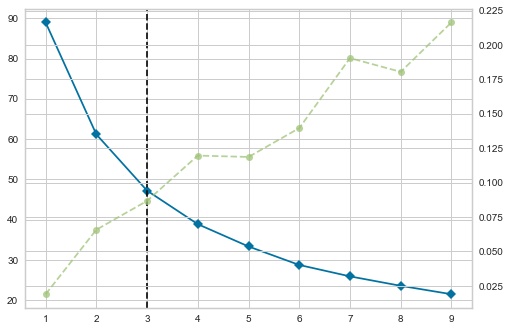

In [25]:
range_n_clusters = [2, 3, 4, 5, 6,7,8]
silhouette_visualizer(range_n_clusters, X)

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X)        # Fit the data to the visualizer

In [26]:
n = 5
kmeans = KMeans(n_clusters=n)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [27]:
clus_ener = ener_upm_mean.dropna().copy()
clus_ener['cluster'] = labels

In [28]:
clus_ener

,CVE_ZM,upm,ing_cor,fuel,gas,kwh,total_ener,kwh_d,fuel_d,gas_d,income_d,cluster
0,1.01,1,160035.794000,859.540356,592.568676,135.033392,1178.206883,3.0,6.0,9.0,9,0
1,1.01,2,114394.640000,1488.530960,0.434214,128.887426,1245.611307,2.0,8.0,6.0,9,1
2,1.01,3,64730.850000,596.511842,520.833750,69.000445,759.551090,0.0,3.0,9.0,7,0
3,1.01,4,59461.474000,723.429653,368.274739,123.111004,1141.160448,2.0,4.0,9.0,6,0
4,1.01,5,44782.290000,602.857771,0.385614,96.508521,458.531675,0.0,3.0,5.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5892,32.01,8319,82705.530000,801.885454,0.748159,122.070761,503.291827,2.0,5.0,7.0,8,2
5893,32.01,8320,41632.293333,666.316376,0.415767,113.804384,558.084595,1.0,4.0,5.0,3,2
5894,32.01,8321,130279.955000,2376.313310,0.358023,115.175843,1699.563727,2.0,9.0,5.0,9,1
5895,32.01,8322,62875.661667,741.673939,0.302499,107.168915,849.094937,1.0,5.0,3.0,6,2


Text(0.049826165457624, -0.06420974047744715, 'Fuel')

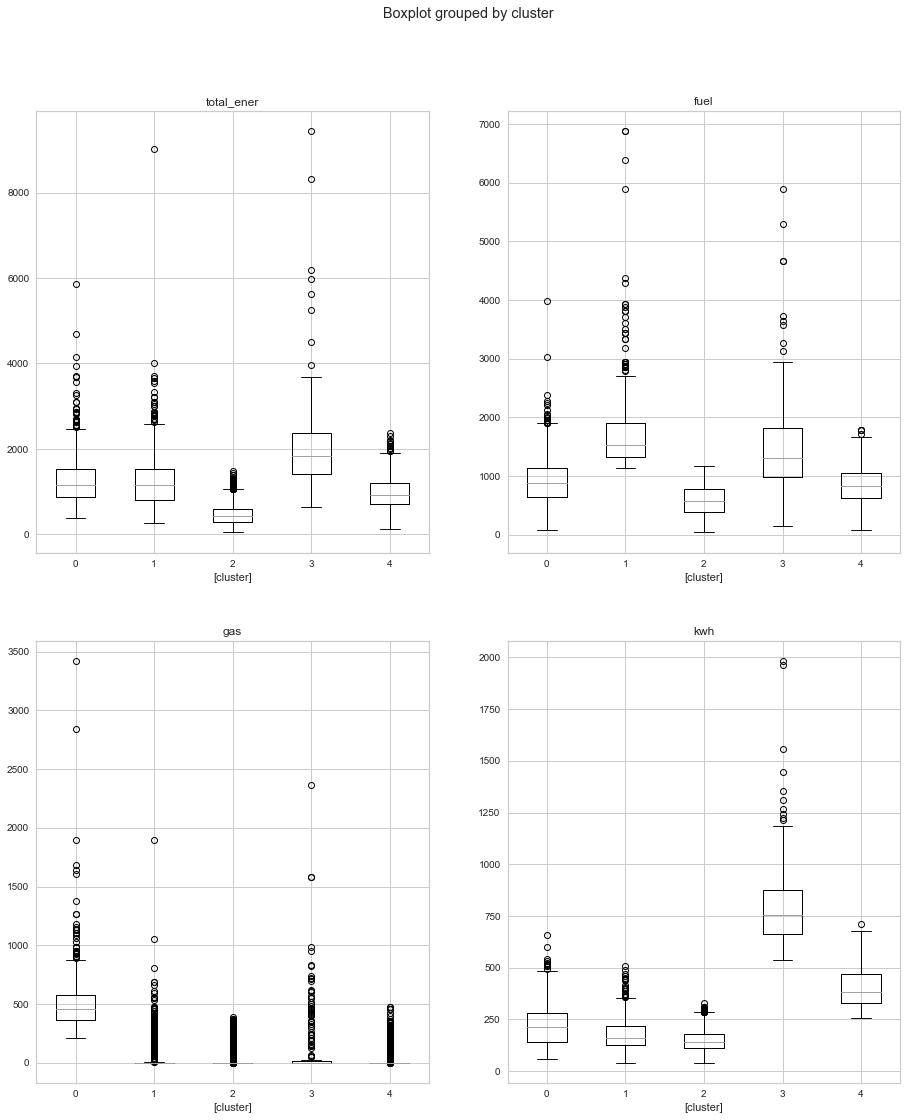

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,18))

clus_ener.boxplot(column=['total_ener'], by=['cluster'], ax=axes[0,0]) # figsize=(15,18)
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

clus_ener.boxplot(column=['fuel'], by=['cluster'],  ax=axes[0,1])
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

clus_ener.boxplot(column=['gas'], by=['cluster'],  ax=axes[1,0])
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

clus_ener.boxplot(column=['kwh'], by=['cluster'],  ax=axes[1,1])
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

## Metropolitan area vs Cluster

In [30]:
metropoli_clus = clus_ener.loc[clus_ener['CVE_ZM'].notnull(),['CVE_ZM','cluster','upm']].groupby(['CVE_ZM','cluster']).count()

In [31]:
metro_clus_perc = metropoli_clus.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

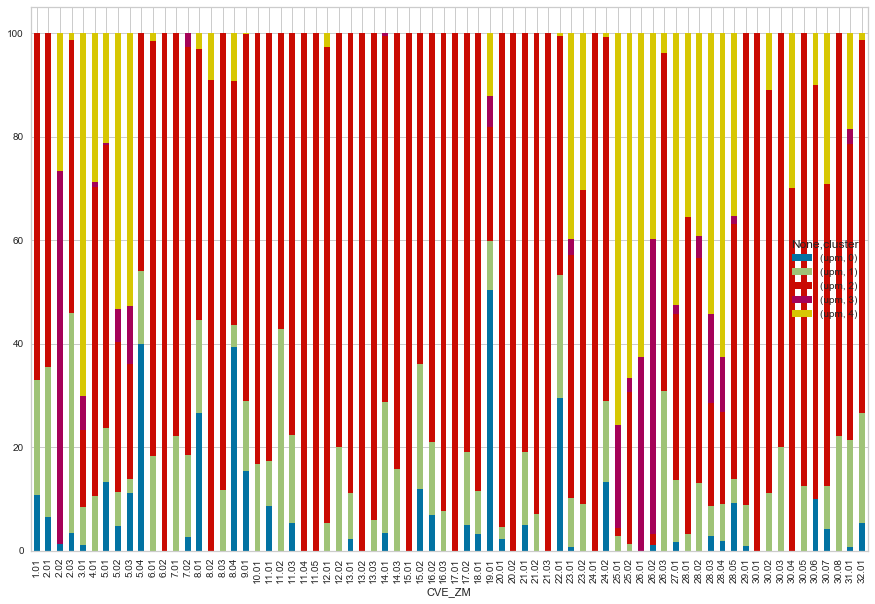

In [32]:
metro_clus_perc.unstack().plot(kind='bar', stacked=True, figsize=(15,10))

In [33]:
df = metro_clus_perc.unstack()
df = df.fillna(0)

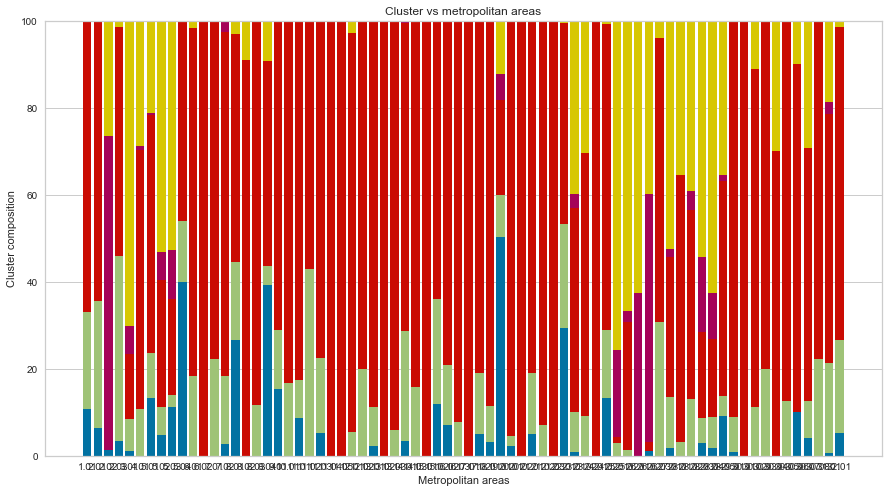

In [34]:
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(df.index.values.astype(str), df['upm',0].values, label='0')
ax.bar(df.index.values.astype(str), df['upm',1].values, bottom=df['upm',0].values, label='1')
ax.bar(df.index.values.astype(str), df['upm',2].values, bottom=df['upm',1].values+df['upm',0], label='2')
ax.bar(df.index.values.astype(str), df['upm',3].values, bottom=df['upm',2].values+df['upm',1].values+df['upm',0], label='3')
ax.bar(df.index.values.astype(str), df['upm',4].values, bottom=df['upm',3].values+df['upm',2].values+df['upm',1].values+df['upm',0], label='4')

ax.set_ylabel('Cluster composition')
ax.set_xlabel('Metropolitan areas')
ax.set_title('Cluster vs metropolitan areas') 
ax.legend()

plt.show()

## Cluster estrato

In [35]:
cluster_estrato = ener.loc[ener['CVE_ZM'].notnull(), ['upm','est_socio']].merge(clus_ener[['upm','cluster']], on='upm', how='left')
cluster_estrato = cluster_estrato[cluster_estrato['cluster'].notnull()]
cluster_estrato['cluster'] = cluster_estrato['cluster'].astype(int)

In [36]:
clus_est = cluster_estrato.groupby(['cluster','est_socio']).count()
clus_est_per = clus_est.groupby(level=0).apply(lambda x:
                                                100 * x / float(x.sum()))
df = clus_est_per.unstack()

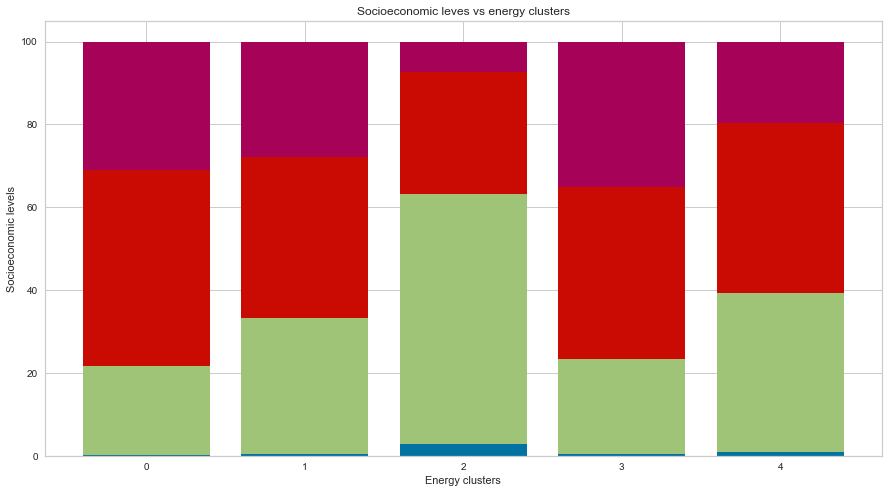

In [37]:
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(df.index.values.astype(str), df['upm',1].values, label='1')
ax.bar(df.index.values.astype(str), df['upm',2].values, bottom=df['upm',1].values, label='2')
ax.bar(df.index.values.astype(str), df['upm',3].values, bottom=df['upm',1].values+df['upm',2], label='3')
ax.bar(df.index.values.astype(str), df['upm',4].values, bottom=df['upm',1].values+df['upm',2].values+df['upm',3], label='4')

ax.set_ylabel('Socioeconomic levels')
ax.set_xlabel('Energy clusters')
ax.set_title('Socioeconomic leves vs energy clusters')   
ax.legend()

plt.show()

## Income vs Metropolis
income and consumption per capita

In [38]:
income_ener = ener[['CVE_ZM','tot_integ','ing_cor','total_ener']].dropna()

In [39]:
income_zm = income_ener.groupby('CVE_ZM', as_index=False).sum()
income_zm['income_capita'] = income_zm['ing_cor']/income_zm['tot_integ']
income_zm['ener_capita'] = income_zm['total_ener']/income_zm['tot_integ']

Text(0.5, 1.0, 'Income vs energy consumption')

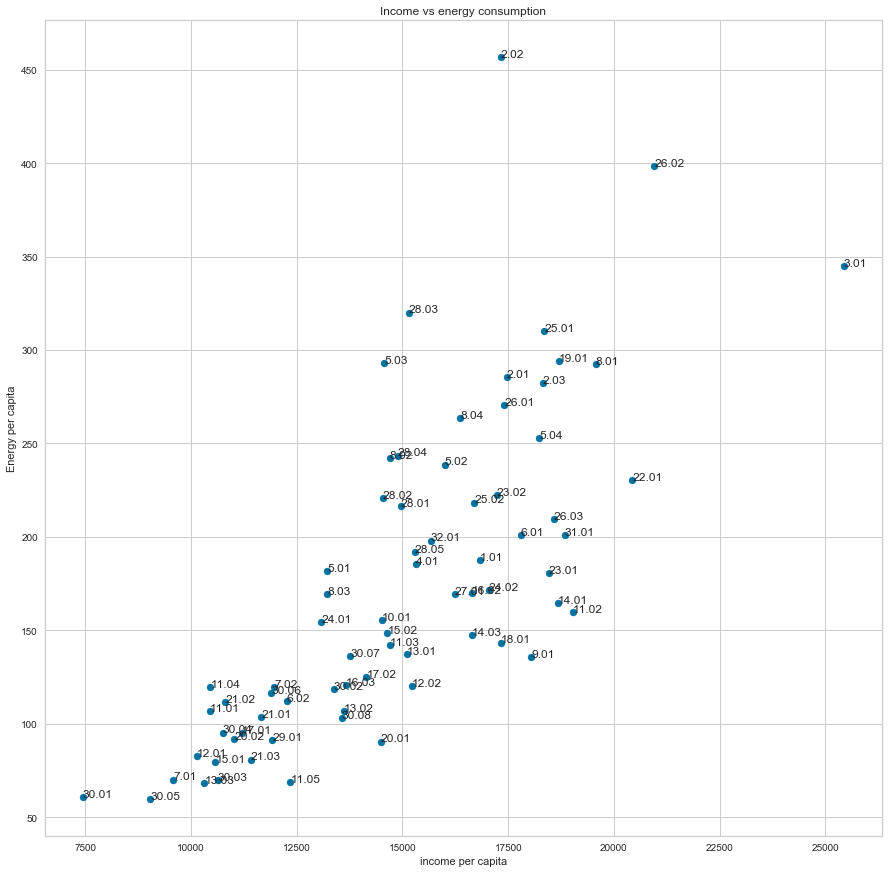

In [40]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(income_zm['income_capita'], income_zm['ener_capita'])

for i, n in enumerate(income_zm['CVE_ZM']):
    ax.annotate(n, (income_zm.loc[i,'income_capita'], income_zm.loc[i, 'ener_capita']))
    
ax.set_ylabel('Energy per capita')
ax.set_xlabel('income per capita')
ax.set_title('Income vs energy consumption')    

## Cluster vs temperature

In [41]:
temp_season = pd.read_pickle(pkls_path + '/temp_season_mun.pkl')
temp_season.head()

,CVE_MUN,Winter,Spring,Summer,Fall,max
0,1001,13.242611,18.714286,20.383949,17.192980,21.284910
1,1005,12.991325,18.370768,19.818192,16.760830,20.828707
2,1011,12.995048,18.727809,20.463810,17.045714,21.378287
3,2001,12.520194,15.755021,23.148775,19.307285,24.536871
4,2002,13.152247,18.867188,28.126219,21.820882,29.293267


In [42]:
clus_ener_temp = clus_ener.merge(ener[['CVE_MUN', 'upm']], on='upm', how='left')
clus_ener_temp = clus_ener_temp.merge(temp_season[['CVE_MUN','Summer']], on='CVE_MUN', how='left')
clus_ener_temp['temperature'] = pd.qcut(clus_ener_temp.Summer, 3, labels=['low','medium','high'])

clus_ener_temp['cluster'] = clus_ener_temp['cluster'].astype(int)

In [43]:
clus_temp = clus_ener_temp[['cluster','temperature','upm']].groupby(['cluster','temperature']).count()

In [44]:
clus_temp_per = clus_temp.groupby(level=0).apply(lambda x:
                                                100 * x / float(x.sum()))
df = clus_temp_per.unstack()
df = df.fillna(0)

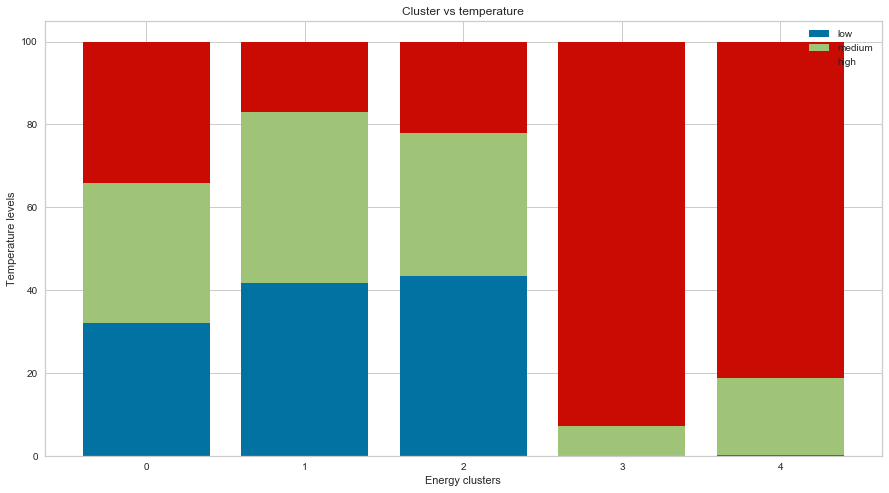

In [45]:
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(df.index.values.astype(str), df['upm','low'].values, label='low')
ax.bar(df.index.values.astype(str), df['upm','medium'].values, bottom=df['upm','low'].values, label='medium')
ax.bar(df.index.values.astype(str), df['upm','high'].values, bottom=df['upm','medium'].values+df['upm','low'], label='high')

ax.set_ylabel('Temperature levels')
ax.set_xlabel('Energy clusters')
ax.set_title('Cluster vs temperature')
ax.legend()

plt.show()

In [46]:
temp_ener = ener[['CVE_ZM','CVE_MUN','tot_integ','total_ener']].dropna()
temp_ener = temp_ener.merge(temp_season[['CVE_MUN','Summer']], on='CVE_MUN', how='left')

In [47]:
zm_temp_ener = temp_ener.groupby('CVE_ZM', as_index=False).agg({'tot_integ': 'sum', 'total_ener': 'sum', 'Summer': 'mean'})
zm_temp_ener['ener_capita'] = zm_temp_ener['total_ener']/zm_temp_ener['tot_integ']

In [48]:
zm_temp_ener

,CVE_ZM,tot_integ,total_ener,Summer,ener_capita
0,1.01,4606,8.640979e+05,20.346157,187.602672
1,2.01,655,1.870943e+05,23.148775,285.640097
2,2.02,1372,6.265134e+05,28.126219,456.642391
3,2.03,3070,8.673790e+05,21.297647,282.533892
4,3.01,1887,6.507249e+05,26.339452,344.846261
5,4.01,1905,3.534656e+05,27.781306,185.546247
6,5.01,4187,7.613002e+05,25.409390,181.824732
7,5.02,1216,2.902497e+05,27.323310,238.692221
8,5.03,660,1.933546e+05,29.391746,292.961459
9,5.04,2762,6.979367e+05,22.542843,252.692511


Text(0.5, 1.0, 'Temperature vs energy consumption')

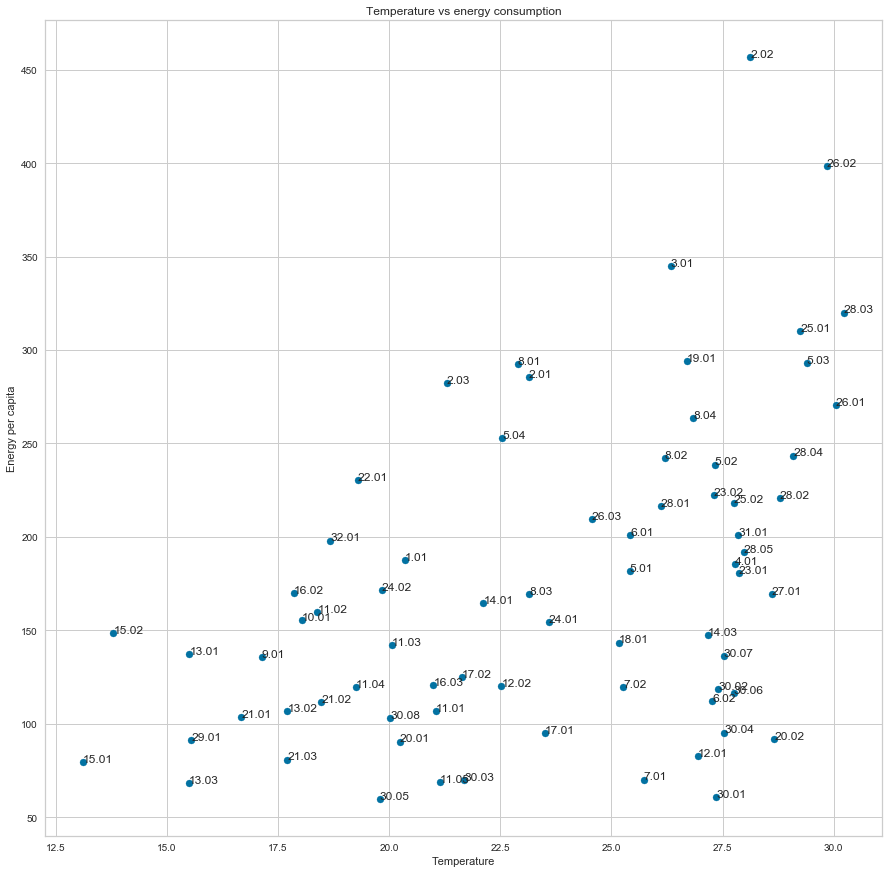

In [49]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(zm_temp_ener['Summer'], zm_temp_ener['ener_capita'])

for i, n in enumerate(zm_temp_ener['CVE_ZM']):
    ax.annotate(n, (zm_temp_ener.loc[i,'Summer'], zm_temp_ener.loc[i, 'ener_capita']))
    
ax.set_ylabel('Energy per capita')
ax.set_xlabel('Temperature')
ax.set_title('Temperature vs energy consumption')   

## Ownership Solar Thermal

In [52]:
cluster_solar = ener.loc[ener['CVE_ZM'].notnull(), ['upm','calent_sol']].merge(clus_ener[['upm','cluster']], on='upm', how='left')
cluster_solar = cluster_solar[cluster_solar['cluster'].notnull()]
cluster_solar['cluster'] = cluster_solar['cluster'].astype(int)

In [54]:
clus_sol = cluster_solar.groupby(['cluster','calent_sol']).count()
clus_sol_per = clus_sol.groupby(level=0).apply(lambda x:
                                                100 * x / float(x.sum()))
df = clus_sol_per.unstack()

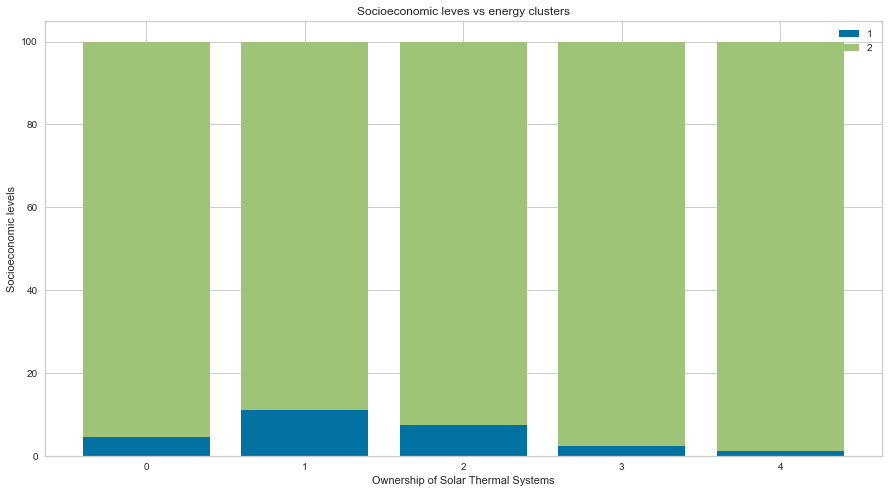

In [59]:
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(df.index.values.astype(str), df['upm',1].values, label='1')
ax.bar(df.index.values.astype(str), df['upm',2].values, bottom=df['upm',1].values, label='2')

ax.set_ylabel('Socioeconomic levels')
ax.set_xlabel('Ownership of Solar Thermal Systems')
ax.set_title('Socioeconomic leves vs energy clusters')   
ax.legend()

plt.show()

In [60]:
ener


,folioviv,foliohog,CVE_MUN,estado,publico,CVE_ZM,NOM_ZM,CVE_ENT,NOM_ENT,NOM_MUN,tam_loc,est_socio,est_dis,upm,factor,clase_hog,sexo_jefe,edad_jefe,educa_jefe,tot_integ,hombres,mujeres,mayores,menores,ocupados,ing_cor,gasto_mon,energia,vehiculos,tipo_viv,antiguedad,num_cuarto,disp_elect,focos_inca,focos_ahor,combustible,tenencia,calent_sol,calent_gas,tanque_gas,aire_acond,calefacc,gasto_tri_ele,gasto_tri_gas,gasto_tri_lpg,gasto_tri_oil,gasto_tri_diesel,gasto_tri_coal,gasto_tri_wood,gasto_tri_heat,gasto_tri_Magna,gasto_tri_Premium,gasto_tri_Die-Gas,gasto_tri_total_gas,gasto_tri_total_gasolina,Tarifa,Region,lpg_kwh,g_natural_kwh,magna_kwh,premium_kwh,diesel_kwh,kwh,fuel,gas,total_ener
0,100013601,1,1001,1,0.00,1.01,Aguascalientes,1,Aguascalientes,Aguascalientes,1,3,2,1,175,2,1,74,4,3,2,1,3,0,2,76403.70,18551.47,3600.00,1,1.0,42.0,6,1,0.0,6.0,4.0,4,1,1,2,2,2,600.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,7200.00,NaN,NaN,3000.00,7200.00,1,SP,NaN,1578.284091,1180.332920,NaN,NaN,158.129476,1180.332920,1578.284091,2916.746487
1,100013602,1,1001,1,578.56,1.01,Aguascalientes,1,Aguascalientes,Aguascalientes,1,3,2,1,175,2,1,48,11,5,2,3,5,0,2,42987.73,55470.99,495.00,2,1.0,40.0,6,1,0.0,12.0,4.0,2,2,1,2,2,2,450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3600.00,NaN,NaN,NaN,3600.00,1,SP,NaN,NaN,590.166460,NaN,NaN,142.746376,590.166460,NaN,732.912836
2,100013603,1,1001,1,4255.68,1.01,Aguascalientes,1,Aguascalientes,Aguascalientes,1,3,2,1,175,2,1,39,10,2,1,1,2,0,2,580697.74,103106.89,2475.00,1,1.0,50.0,7,1,0.0,12.0,3.0,4,2,1,1,2,2,375.0,NaN,2100.00,NaN,NaN,NaN,NaN,NaN,NaN,4500.0,NaN,2100.00,4500.00,1,SP,0.558142,NaN,NaN,684.051278,NaN,125.505879,684.051278,0.558142,810.115300
3,100013604,1,1001,1,0.00,1.01,Aguascalientes,1,Aguascalientes,Aguascalientes,1,3,2,1,175,2,2,70,8,2,1,1,2,0,0,46252.71,19340.06,858.00,1,1.0,45.0,5,1,0.0,7.0,4.0,4,1,1,2,2,2,480.0,378.0,NaN,NaN,NaN,NaN,NaN,NaN,6000.00,NaN,NaN,378.00,6000.00,1,SP,NaN,198.863795,983.610767,NaN,NaN,145.822996,983.610767,198.863795,1328.297558
4,100013606,1,1001,1,0.00,1.01,Aguascalientes,1,Aguascalientes,Aguascalientes,1,3,2,1,175,2,2,51,4,4,1,3,3,1,2,53837.09,13605.03,300.00,0,1.0,40.0,4,1,0.0,7.0,4.0,2,2,1,2,2,2,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,SP,NaN,NaN,NaN,NaN,NaN,102.962235,NaN,NaN,102.962235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31095,3202439919,1,32050,32,5258.53,32.01,Zacatecas-Guadalupe,32,Zacatecas,Vetagrande,3,2,541,8351,241,2,2,70,1,2,0,2,2,0,0,36473.99,15867.53,322.50,0,1.0,80.0,4,1,3.0,4.0,3.0,2,2,1,2,2,2,322.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,SP,NaN,NaN,NaN,NaN,NaN,109.725328,NaN,NaN,109.725328
31096,3202439921,1,32050,32,0.00,32.01,Zacatecas-Guadalupe,32,Zacatecas,Vetagrande,3,2,541,8351,241,1,1,60,3,1,1,0,1,0,1,4461.28,2758.62,73.50,1,1.0,70.0,2,1,0.0,1.0,1.0,5,2,1,2,2,2,73.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,SP,NaN,NaN,NaN,NaN,NaN,26.633909,NaN,NaN,26.633909
31097,3202439922,1,32050,32,0.00,32.01,Zacatecas-Guadalupe,32,Zacatecas,Vetagrande,3,2,541,8351,241,2,1,33,6,5,2,3,2,3,2,18201.84,4159.04,300.00,0,1.0,12.0,3,1,1.0,5.0,3.0,4,1,2,2,2,2,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,SP,NaN,NaN,NaN,NaN,NaN,102.962235,NaN,NaN,102.962235
31098,3202439923,1,32050,32,1838.54,32.01,Zacatecas-Guadalupe,32,Zacatecas,Vetagrande,3,2,541,8351,241,2,2,51,3,3,0,3,3,0,2,37885.71,8836.84,180.00,2,1.0,14.0,5,1,2.0,4.0,3.0,4,1,2,2,2,2,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,SP,NaN,NaN,NaN,NaN,NaN,65.225899,NaN,NaN,65.225899
